In [1]:
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [2]:
# Carregar dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [3]:
# jogar informacoes do dataset em variaveis
qtd, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

In [5]:
# dividir treino e teste (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
print('X (dados de imagens) (n_els, numpixels)', X.shape, ':\n', X, '\n')
print('y (rotulos)', y.shape, ':\n', y, '\n')
print('target_names', target_names.shape, ':\n', target_names, '\n')

X (1140, 2914) :
 [[ 82.666664  87.666664  65.333336 ... 106.       140.       199.33333 ]
 [ 52.333332  49.333332  69.333336 ... 235.66667  228.66667  222.      ]
 [ 37.333332  39.        41.666668 ...  97.        71.666664  59.333332]
 ...
 [228.33333  224.33333  216.       ... 149.66667  145.66667  164.66667 ]
 [ 97.666664 118.333336 133.33333  ... 219.       210.       142.      ]
 [ 39.333332  79.333336 109.333336 ...  24.333334  34.333332  24.      ]] 

y (1140,) :
 [2 3 1 ... 4 2 4] 

target_names (5,) :
 ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair'] 



In [7]:
# Computar PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# aplicar transformacao PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca', X_train_pca.shape, ':\n', X_train_pca, '\n')
print('X_test_pca', X_test_pca.shape, ':\n', X_test_pca, '\n')
print(pca.components_.shape)
eigenfaces = pca.components_.reshape((n_components, h, w))

print('eigenfaces', eigenfaces.shape, ':\n', eigenfaces, '\n')

X_train_pca (798, 100) :
 [[ 0.25116903 -0.98238283 -0.18438189 ... -0.23915061 -1.0860529
   1.3874067 ]
 [ 0.35335195 -0.23733705  0.597432   ...  1.2087847  -2.6883023
   0.01326353]
 [-0.0059741  -0.32130677 -0.6064385  ... -0.48366132  0.5994409
   0.7858279 ]
 ...
 [-0.25978392  0.11115162  0.27692482 ...  0.7506441  -1.0882205
   2.682238  ]
 [ 0.11704134 -3.0331063  -0.03164637 ...  0.11838321 -0.1389251
  -1.0478532 ]
 [-0.63290983  0.03760745 -0.03740905 ...  0.25192714 -0.27202675
   0.68765926]] 

X_test_pca (342, 100) :
 [[-6.6702724e-01  8.8829392e-01  3.5341144e-01 ... -2.8867188e-01
   3.7932643e-01 -1.0810377e-01]
 [ 1.0298235e+00 -7.0032966e-01 -5.4174155e-01 ... -1.6067961e-01
   1.2254925e+00  7.3109694e-02]
 [-1.4633338e-01 -1.6643806e+00  1.4624161e+00 ... -1.5153237e-01
   8.1663394e-01  6.9877046e-01]
 ...
 [ 1.6316168e-01 -5.5073299e-02 -9.9313653e-01 ... -9.9290138e-01
  -2.1097956e+00  7.7134359e-01]
 [ 4.8988515e-01  2.1577586e-01 -3.8947123e-01 ... -4.57235

In [8]:
# treinar rede neural
print("Fitting the classifier to the training set")
clf = MLPClassifier(
        hidden_layer_sizes=(1024,),
        batch_size=256, verbose=True,
        early_stopping=True
    ).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.65400019
Validation score: 0.562500
Iteration 2, loss = 1.16246250
Validation score: 0.612500
Iteration 3, loss = 0.91584805
Validation score: 0.625000
Iteration 4, loss = 0.73586101
Validation score: 0.687500
Iteration 5, loss = 0.58575955
Validation score: 0.737500
Iteration 6, loss = 0.46336029
Validation score: 0.775000
Iteration 7, loss = 0.37544151
Validation score: 0.775000
Iteration 8, loss = 0.30791604
Validation score: 0.787500
Iteration 9, loss = 0.25431090
Validation score: 0.812500
Iteration 10, loss = 0.21169782
Validation score: 0.812500
Iteration 11, loss = 0.17780225
Validation score: 0.825000
Iteration 12, loss = 0.15081178
Validation score: 0.825000
Iteration 13, loss = 0.12902737
Validation score: 0.825000
Iteration 14, loss = 0.11122660
Validation score: 0.812500
Iteration 15, loss = 0.09598135
Validation score: 0.812500
Iteration 16, loss = 0.08400711
Validation score: 0.812500
Iteration 17, loss = 0

In [9]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.87      0.78      0.82        69
  Donald Rumsfeld       0.81      0.81      0.81        42
    George W Bush       0.82      0.94      0.88       154
Gerhard Schroeder       1.00      0.74      0.85        38
       Tony Blair       0.82      0.69      0.75        39

         accuracy                           0.84       342
        macro avg       0.86      0.79      0.82       342
     weighted avg       0.85      0.84      0.84       342



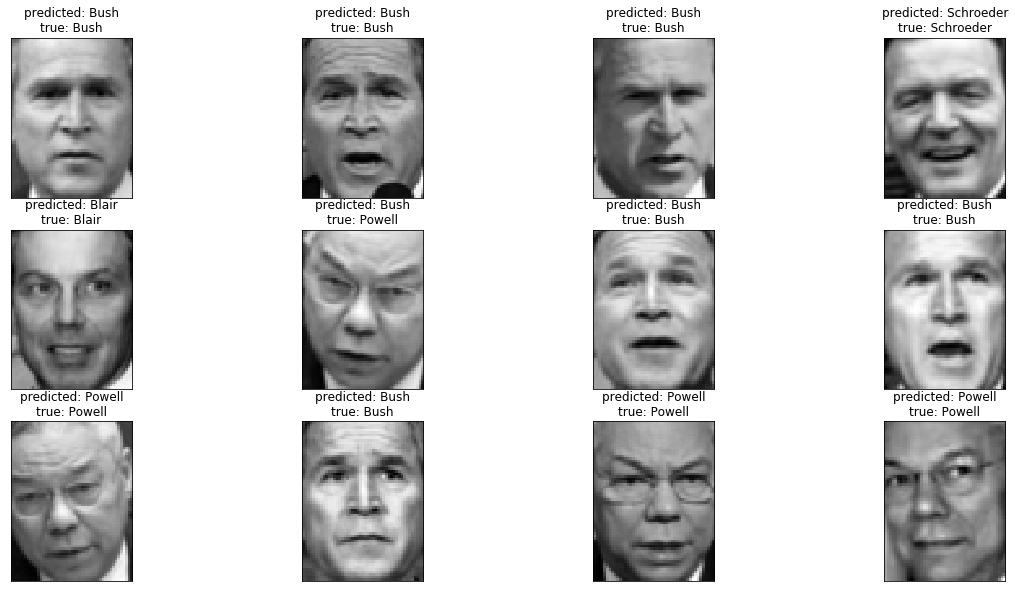

In [10]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

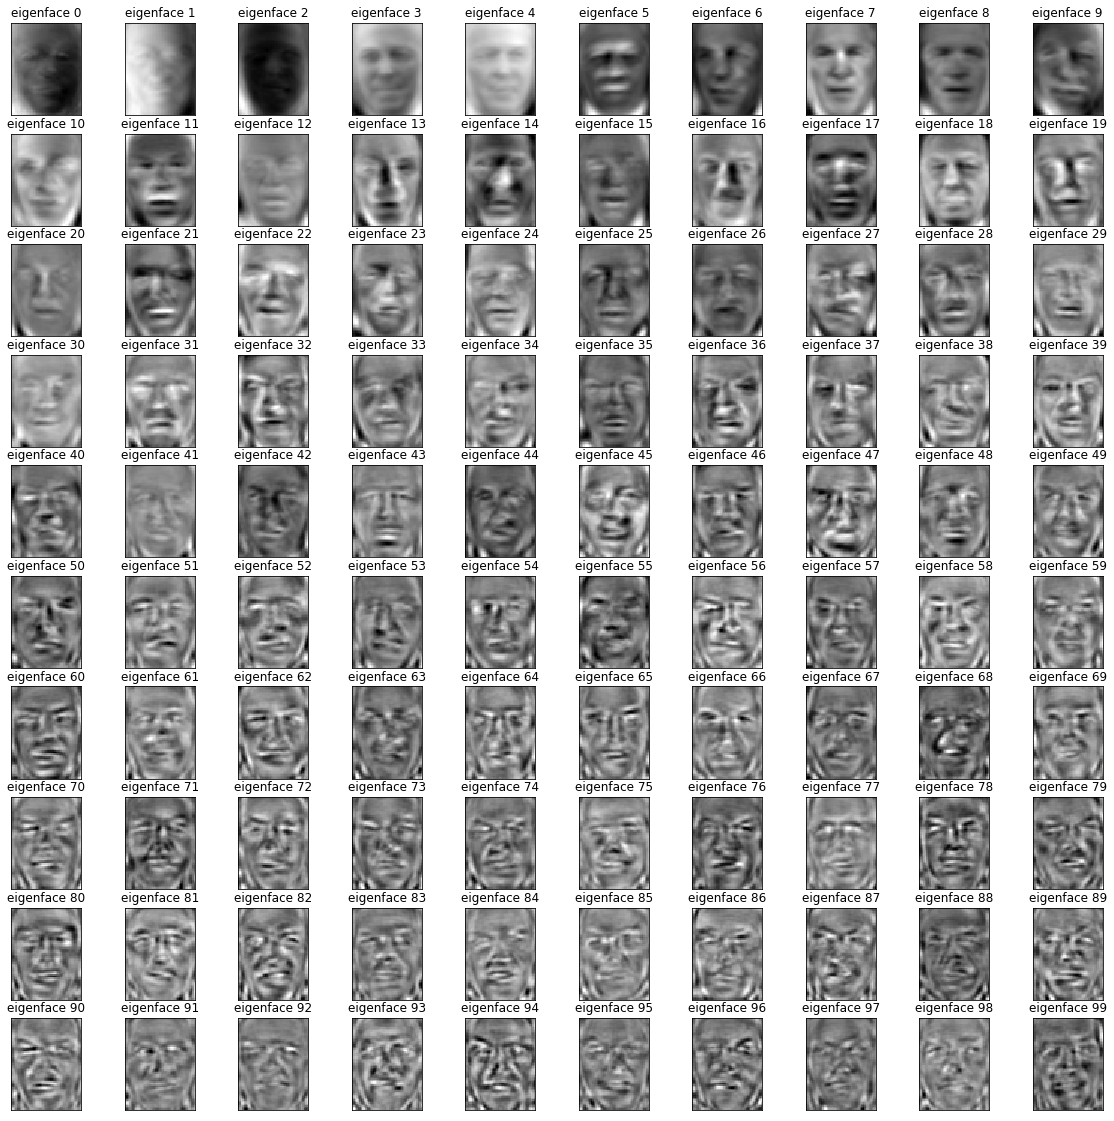

In [11]:
def faces_gallery(images, titles, h, w, rows=10, cols=10):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
faces_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [12]:
 print(eigenfaces[0])

[[-0.00236129 -0.00276852 -0.00304779 ... -0.01202387 -0.01158587
  -0.01167922]
 [-0.00220091 -0.00267036 -0.00327453 ... -0.01200084 -0.01163634
  -0.01202859]
 [-0.00231196 -0.00313531 -0.00367051 ... -0.01232529 -0.01184683
  -0.01256938]
 ...
 [ 0.00649056  0.00793992  0.00760637 ... -0.02035411 -0.0187334
  -0.01779469]
 [ 0.00591746  0.00729206  0.00756055 ... -0.01925551 -0.01802417
  -0.01711824]
 [ 0.00517956  0.00679349  0.00715255 ... -0.018503   -0.01774522
  -0.01641007]]


In [13]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[779593.8    641425.56   300986.44   239880.58   202015.08   120435.914
 105497.24    92323.195   84935.54    78549.65    66383.15    58706.4
  51195.465   44102.926   40682.992   39088.965   37614.65    34636.312
  32177.895   30521.234   27888.629   27654.148   25815.092   25021.465
  22605.615   20737.557   20252.412   19874.031   19518.844   17152.111
  17033.219   16120.515   15294.414   14826.576   14241.6045  13720.057
  13392.788   13106.103   12658.445   11993.286   11847.232   11631.213
  11072.81    10724.554   10570.577   10187.318    9716.125    9576.784
   9312.386    9136.936    8825.906    8424.741    8268.691    8152.9985
   7867.1167   7768.5435   7645.3364   7453.7085   7272.595    7175.1826
   6961.147    6778.784    6732.254    6556.7197   6330.9795   6183.619
   6105.86     6063.881    5905.0005   5585.906    5521.8438   5464.13
   5388.6733   5370.2095   5237.3315   5036.6704   4974.3726   4949.9272
   4841.3257   4736.223    4708.944    4671.405    4542.622    4